In [1]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

In [5]:
df = pd.read_csv('data1.csv')
df

text  label
0    unclear whether replacement conventional mandi...      1
1      surgical correction snout suffocation syndrome       1
2    diabetes mellitus prevalent disorder worldwide...      1
3    dental endosseous implant assessment type diab...      1
4    implantsupported denture patient huntington di...      1
..                                                 ...    ...
453  asserted success rate oral appliance satisfact...      0
454  aim study investigate whether wearing complete...      0
455  treatment obstructive sleep apnea osa dentate ...      0
456  treatment obstructive sleep apnea osa dentate ...      0
457  paper report case oral appliance used treatmen...      0

[458 rows x 2 columns]

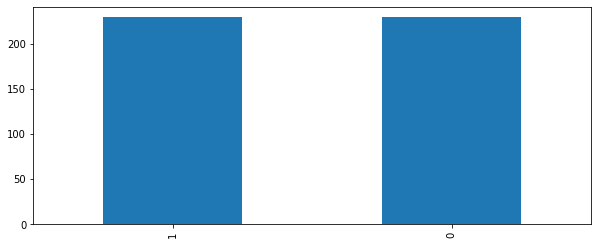

In [6]:
my_label = ['0','1']
plt.figure(figsize=(10,4))
df.label.value_counts().plot(kind='bar');

In [8]:
X = df.text
y = df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_label))

accuracy 0.9565217391304348
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        64
           1       0.93      1.00      0.96        74

    accuracy                           0.96       138
   macro avg       0.96      0.95      0.96       138
weighted avg       0.96      0.96      0.96       138



In [13]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_label))

accuracy 0.9927536231884058
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        64
           1       0.99      1.00      0.99        74

    accuracy                           0.99       138
   macro avg       0.99      0.99      0.99       138
weighted avg       0.99      0.99      0.99       138

